In [1]:
from ptp.models.gan_3d.gan3d import Generator
from ptp.models.gan_3d.discriminator import Discriminator
from ptp.models.gan_3d.gan3d import GAN3D
from ptp.models.utils import num_trainable_params
from ptp.evaluation.visualization import visualize_slices, visualize_volumes, plot_slice
from ptp.models.losses import tce_loss
from pathlib import Path
from lightning.pytorch.loggers import TensorBoardLogger

import matplotlib.pyplot as plt
import nibabel as nib  
import numpy as np
import wandb

from monai.data import MetaTensor
import pytorch_lightning as pl
import torch
from torch import nn
import os

In [2]:
DATA_DIR = Path('/teamspace/uploads')
TARGET_DATA_DIR = DATA_DIR
INPUT_DIR = Path('/teamspace/studios/this_studio')
MODELS_DIR = INPUT_DIR / 'models'
TRAINING_DIR = INPUT_DIR / 'training'
os.makedirs(TRAINING_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

In [3]:
model_name = 'TEST-GAN'
checkpoint_dir = TRAINING_DIR / model_name

In [4]:
percentile = 10
n_critic = 5  # for training more k steps about Discriminator

In [5]:
gan = GAN3D(target_data_dir=TARGET_DATA_DIR, model_dir=checkpoint_dir, 
percentile=percentile, n_critic=n_critic, recon_loss=lambda x, y: 0)

In [6]:
print(f"Generator size is {num_trainable_params(gan.G)}")
print(f"Discriminator size is {num_trainable_params(gan.D)}")

Generator size is 587011
Discriminator size is 1289201


In [7]:
gan.prepare_data()
train_loader = gan.train_dataloader()

Target stats: (0.04795867777031049, -1.0, 1.0)
Image stats: (0.20243804263895657, -0.9999997019767761, 1.0)


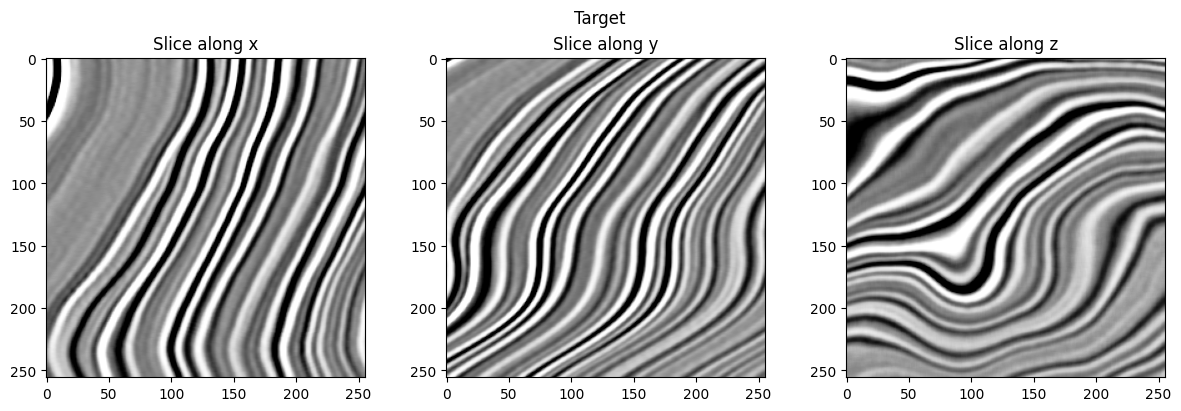

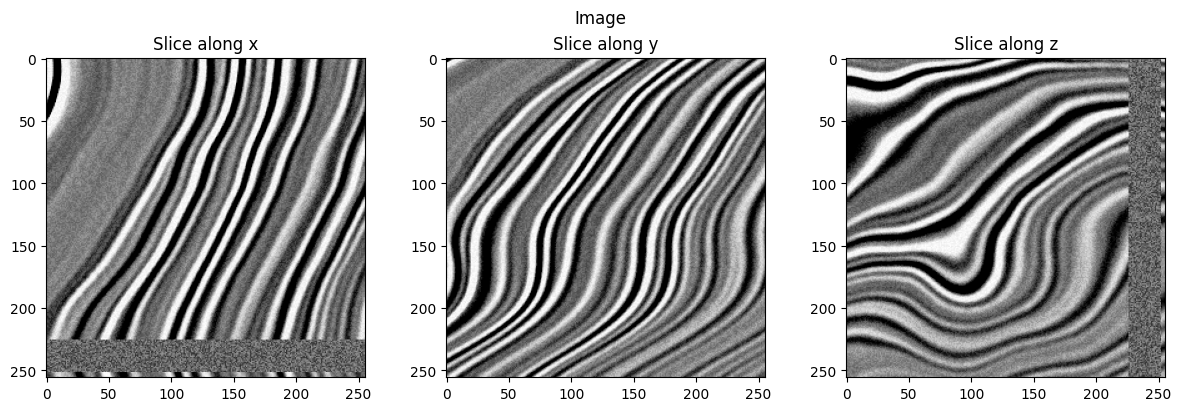

In [8]:
x, y, z = 50, 150, 200
for i, batch in enumerate(train_loader):
    target = nib.Nifti1Image(batch['target'].numpy()[0, 0], np.eye(4))
    image = nib.Nifti1Image(batch['image'].numpy()[0, 0], np.eye(4))
    plot_slice(target, x, y, z, f'Target')
    plot_slice(image, x, y, z, f'Image')
    
    print(f'Target stats: {np.mean(target.get_fdata()), np.min(target.get_fdata()), np.max(target.get_fdata())}')
    print(f'Image stats: {np.mean(image.get_fdata()), np.min(image.get_fdata()), np.max(image.get_fdata())}')

In [9]:
logger = TensorBoardLogger("tb_logs", name=model_name)

In [12]:
max_epochs = 100

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath=checkpoint_dir, filename='{epoch}-{val_loss:.2f}-{train_loss:.2f}', 
                                      monitor=None, save_last=True) 
early_stopping = pl.callbacks.EarlyStopping(monitor='val_loss', verbose=True)

trainer = pl.Trainer(
    max_epochs=max_epochs,
    default_root_dir=checkpoint_dir,
    callbacks=[checkpoint_callback],
    fast_dev_run=False,
    logger=logger
)

trainer.fit(gan)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /teamspace/studios/this_studio/training/TEST-GAN exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type          | Params | Mode 
-----------------------------------------------
0 | G    | Generator     | 587 K  | train
1 | D    | Discriminator | 1.3 M  | train
-----------------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.505     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [11]:
gan = GAN3D.load_from_checkpoint(checkpoint_dir / 'epoch=199-val_loss=1.00-train_loss=0.00.ckpt', target_data_dir=TARGET_DATA_DIR, model_dir=checkpoint_dir, 
percentile=percentile, n_critic=n_critic, recon_loss=lambda x, y: 0)
gan.eval()

RuntimeError: Error(s) in loading state_dict for GAN3D:
	Missing key(s) in state_dict: "D.layers.4.running_mean", "D.layers.4.running_var", "D.layers.4.num_batches_tracked", "D.layers.8.running_mean", "D.layers.8.running_var", "D.layers.8.num_batches_tracked", "D.layers.12.running_mean", "D.layers.12.running_var", "D.layers.12.num_batches_tracked", "D.layers.16.running_mean", "D.layers.16.running_var", "D.layers.16.num_batches_tracked", "D.layers.18.weight", "D.layers.19.bias", "D.layers.19.running_mean", "D.layers.19.running_var", "D.linears.0.weight", "D.linears.0.bias". 
	size mismatch for D.layers.19.weight: copying a param with shape torch.Size([1, 128, 4, 4, 4]) from checkpoint, the shape in current model is torch.Size([256]).

In [13]:
gan.prepare_data()
train_loader = gan.train_dataloader()

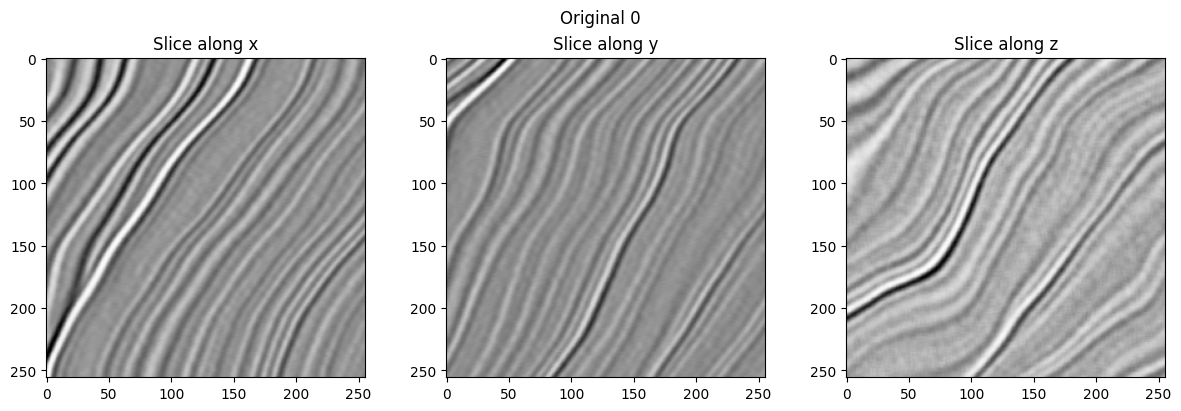

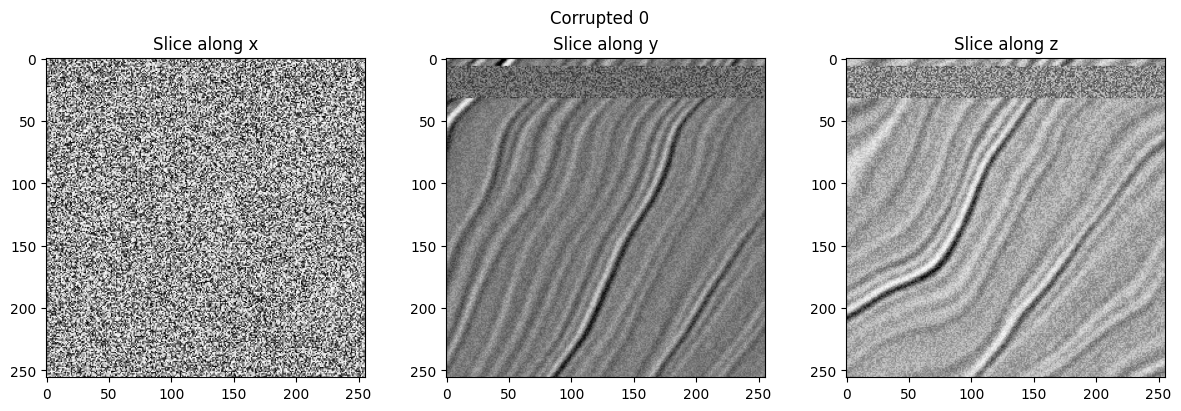

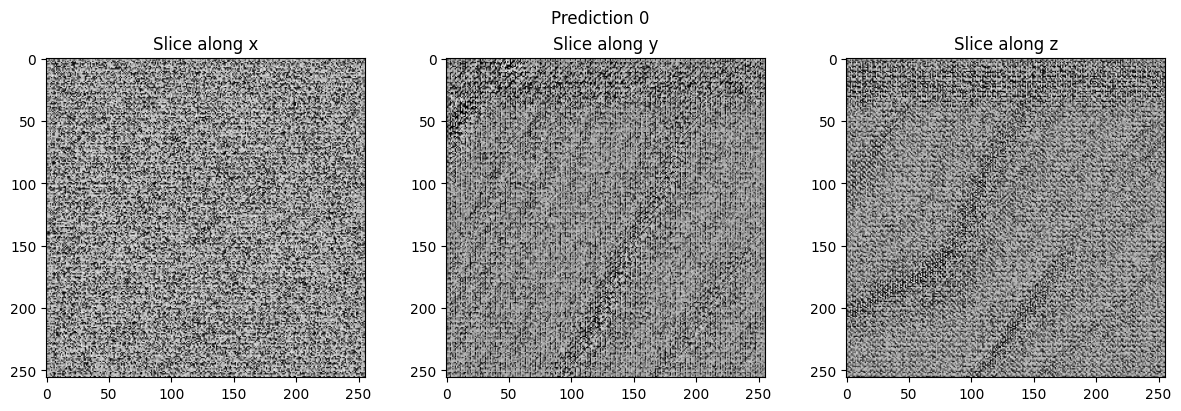

In [14]:
keys = ['target','image', 'prediction']
labels = ['Original','Corrupted', 'Prediction']

for i, batch in enumerate(train_loader):
    prediction = gan(batch['image'])
    batch['prediction'] = prediction
    visualize_volumes(batch, i, keys, labels, True)